# STSA Python pattern: Houston Flood data


![Hurricane Harvey](https://github.com/scottdangelo/houston-flood-2017/blob/master/doc/source/images/Harvey.png)

NASA TERRA MODIS INFRARED IMAGE OF HARVEY AT 0419 UTC 26 AUGUST 2017 JUST AFTER LANDFALL AS A
CATEGORY 4 HURRICANE IN TEXAS. IMAGE COURTESY OF UW/CIMSS. g

## 1.0 Install dependencies and import packages

### 1.1 Install pixiedust

We install the prerequisites using the `!pip install` syntax here.
In some cases, running pip install from a notebook may require a one-time kernel restart. Check the output for messages.
If instructed to restart the kernel, from the notebook toolbar menu: • Go to > Kernel > Restart • Click Restart in the confirmation dialog
> Note: The status of the kernel briefly flashes near the upper right corner, alerting when it is Not Connected, Restarting, Ready, etc. 

In [ ]:
!pip install --upgrade pixiedust

### 1.2 Import the packages

In [ ]:
import pandas as pd
import pixiedust

## 2.0 Obtain and curate data

In order to do data science, or data engineering, we'll need some data.
So, what problem are we trying to solve?

### Where in Houston does flooding occur, and which specific adresses are vulnerable?

### 2.1 Search for data

### 2.2 Download and examine data

We'll use some data that has been cleaned up a bit to expedite things.
* Column headers have been renamed to make more sense
* Unimportant features (columns) have been removed
* Latitude and longitude have been added
* Location name has been added

In [27]:
!wget 'https://www.dropbox.com/s/hrxu2qwcsosrxf5/HuntingBayou.csv?dl=0'

--2019-03-04 20:11:55--  https://www.dropbox.com/s/hrxu2qwcsosrxf5/HuntingBayou.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hrxu2qwcsosrxf5/HuntingBayou.csv [following]
--2019-03-04 20:11:55--  https://www.dropbox.com/s/raw/hrxu2qwcsosrxf5/HuntingBayou.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb646d50b5509e3dc8d025a4625.dl.dropboxusercontent.com/cd/0/inline/Acd86k0kVUPUHUPmSg0hY66qY8-hp2gIZ2UiyE3dQJlLC_tdmzE1Pz_FdHfzuIrE4ky4DImxKVAKLWceUsuCPi9bLYVBdyurPpejcxNsEBBKh5RcJpSpCVu2MF5j3YW4Az4/file# [following]
--2019-03-04 20:11:55--  https://ucb646d50b5509e3dc8d025a4625.dl.dropboxusercontent.com/cd/0/inline/Acd86k0kVUPUHUPmSg0hY66qY8-hp2gIZ2UiyE3dQJlLC_tdmzE1Pz_FdHfzuIrE4ky4DImxKVAKLWceUsuCPi9bLYVBdyurP

In [28]:
!mv HuntingBayou.csv?dl=0 HuntingBayou.csv
!ls

fHuntingBayou.csv?dl=0	foo.csv  HuntingBayou.csv  WhiteoakBayou.csv


In [19]:
!wget 'https://www.dropbox.com/s/5cy0bnw2g62k0w1/WhiteoakBayou.csv?dl=0'

--2019-03-04 19:12:34--  https://www.dropbox.com/s/5cy0bnw2g62k0w1/WhiteoakBayou.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/5cy0bnw2g62k0w1/WhiteoakBayou.csv [following]
--2019-03-04 19:12:35--  https://www.dropbox.com/s/raw/5cy0bnw2g62k0w1/WhiteoakBayou.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucfc0daa0df1977b2214fa572c29.dl.dropboxusercontent.com/cd/0/inline/AcezBtyI50FZr917bjjrUjg_srnixdx4rzDs8ne6rA14il3iVHnkeeGB5UqIcqMBJWXx6Cyq4PJFQTVRApYicOLgewTz8ZsfAqds19gVA5faj9GVpNIcPDBAoNzQlUIJmy8/file# [following]
--2019-03-04 19:12:35--  https://ucfc0daa0df1977b2214fa572c29.dl.dropboxusercontent.com/cd/0/inline/AcezBtyI50FZr917bjjrUjg_srnixdx4rzDs8ne6rA14il3iVHnkeeGB5UqIcqMBJWXx6Cyq4PJFQTVRApYicOLgewTz8Z

In [20]:
!mv WhiteoakBayou.csv?dl=0 WhiteoakBayou.csv
!ls

foo.csv  WhiteoakBayou.csv


### 2.3 Load data into a Pandas dataframe

In [21]:
whiteoak = pd.read_csv('WhiteoakBayou.csv')

### 2.4 Use pixiedust `display()` to  explore the schema and browse the data

#### 2.4.1 Select _DataFrame Table_ icon in the display widget to see the data in tabular form

![pixiedust dataframe icon](https://github.com/scottdangelo/houston-flood-2017/blob/master/doc/source/images/pixieDataFrameIcon.png)

#### 2.4.2 Select the chart icon to pull down and choose `line chart`. Click the `Options` button, and then for `Keys` drag and drop `datetime` and for `Values` drag and drop `Discharge`. This will display the water discharge at this stream gauge in cubic feet per second.

![pixie choose line chart](https://github.com/scottdangelo/houston-flood-2017/blob/master/doc/source/images/pixieChooseLineChart.png)

![pixie options datetime discharge](https://github.com/scottdangelo/houston-flood-2017/blob/master/doc/source/images/pixieOptionsDatetimeDischarge.png)

#### 2.4.3 Look at the diferences in the display of the graph when the `Renderer` is switched from `matplotlib` to `bokeh`. (Note that `brunel` will throw an error)

![pixie change renderer](https://github.com/scottdangelo/houston-flood-2017/blob/master/doc/source/images/pixieChangeRenderer.png)

#### 2.4.4  Click the `Options` button, and then for `Keys` drag and drop `datetime` and for `Values` drag and drop `Gauge_Height`. This will display the height of the water at this stream gauge, in feet.



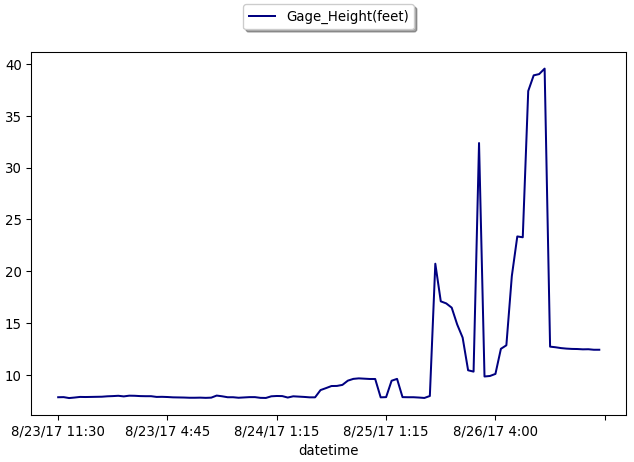

In [23]:
display(whiteoak)

In [7]:
!mv foo.csv?dl=0 foo.csv
!ls

foo.csv


In [8]:
import pandas as pd

hunting = pd.read_csv('./foo.csv')

In [9]:
display(train)

In [32]:
!wget "https://www.dropbox.com/s/smvfax2br0ez4bv/houston.geojson?dl=0"

--2019-03-04 22:51:10--  https://www.dropbox.com/s/smvfax2br0ez4bv/houston.geojson?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.8.1, 2620:100:601b:1::a27d:801
Connecting to www.dropbox.com (www.dropbox.com)|162.125.8.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/smvfax2br0ez4bv/houston.geojson [following]
--2019-03-04 22:51:10--  https://www.dropbox.com/s/raw/smvfax2br0ez4bv/houston.geojson
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb5aa3231d428ba9a083d935362.dl.dropboxusercontent.com/cd/0/inline/Ace3OaGOa-MvTP-RRKl9R50cPRd34Jm06achR9AfHnKTNLQ2hj0RdykUelFesZWlvER5J-6rf36BU8KcPBC6XOKG3sNC8ITZBm2Vf4sDAPwjyt5dqwZzHp7QJZxm95SDX3E/file# [following]
--2019-03-04 22:51:11--  https://ucb5aa3231d428ba9a083d935362.dl.dropboxusercontent.com/cd/0/inline/Ace3OaGOa-MvTP-RRKl9R50cPRd34Jm06achR9AfHnKTNLQ2hj0RdykUelFesZWlvER5J-6rf36BU8KcPBC6XOKG3sNC8ITZBm2V

In [34]:
!mv houston.geojson?dl=0 houston.geojson
!ls

fHuntingBayou.csv?dl=0	houston.geojson   WhiteoakBayou.csv
foo.csv			HuntingBayou.csv
